# 7.7 데이터 확장


리스트7.16 데이터 확장 -회전-

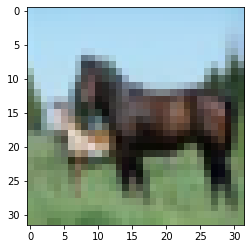

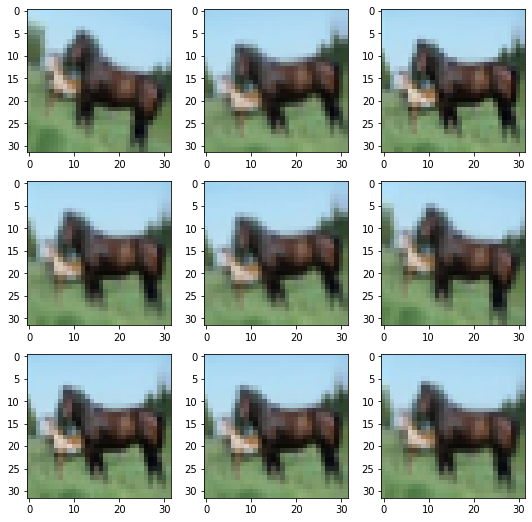

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, t_train), (x_test, t_test) = cifar10.load_data()

cifar10_labels = np.array(["airplane", "automobile", "bird", "cat", "deer",
                           "dog", "frog", "horse", "ship", "truck"])

image = x_train[12]
plt.imshow(image)
plt.show()

def show_images(image, generator):
    channel, height, width = image.shape
    image = image.reshape(1, channel, height, width)  # 배치 대응
    gen = generator.flow(image, batch_size=1)  # 변환된 이미지의 생성

    plt.figure(figsize=(9, 9))
    for i in range(9):
        gen_img = gen.next()[0].astype(np.uint8)  # 이미지 취득
        plt.subplot(3, 3, i + 1)
        plt.imshow(gen_img)
    plt.show()

# -20°에서 20°범위에서 랜덤으로 회전을 실시하는 이미지 생성기 
generator = ImageDataGenerator(rotation_range=20)
show_images(image, generator)

리스트7.17 데이터 확장 -수평 방향으로 시프트-

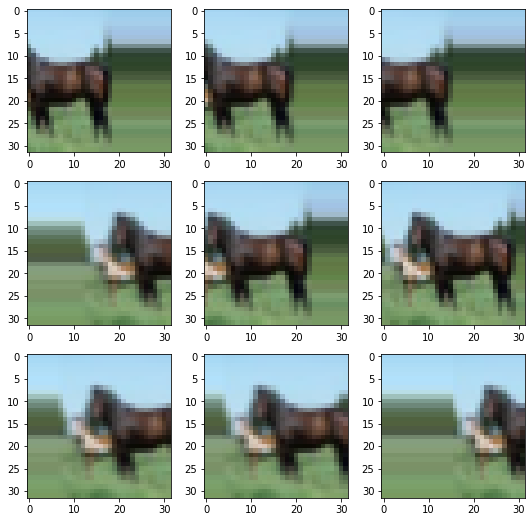

In [2]:
generator = ImageDataGenerator(width_shift_range=0.5)  # 이미지 크기 반의 범위에서 랜덤으로 시프트한다
show_images(image, generator)

리스트7.18 데이터 확장 -수직 방향으로 시프트-

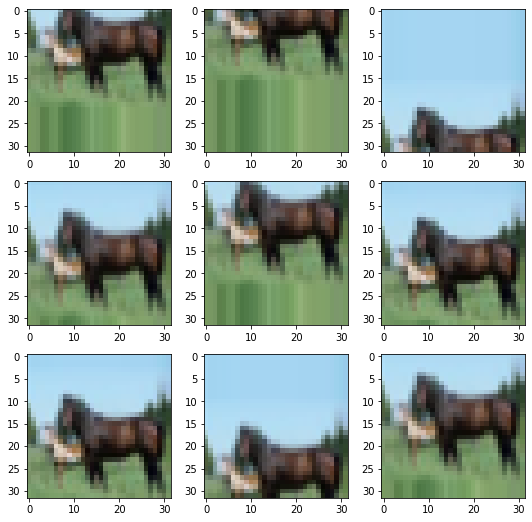

In [3]:
generator = ImageDataGenerator(height_shift_range=0.5)  # 이미지 크기 반의 범위에서 렌덤으로 시프트한다
show_images(image, generator)

리스트7.19 데이터 확장 -시어 강도-

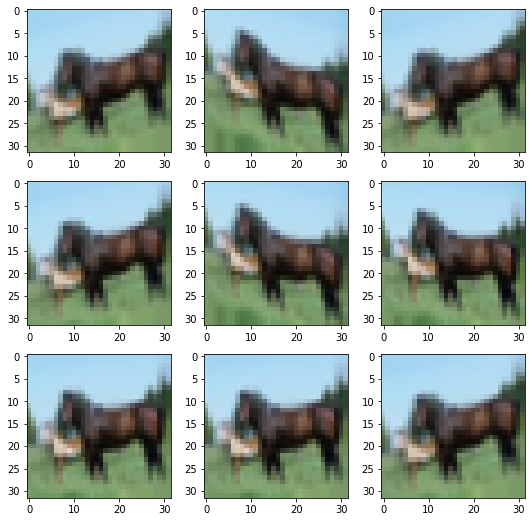

In [4]:
generator = ImageDataGenerator(shear_range=20)  # 시어 강도의 범위를 지정
show_images(image, generator)

리스트7.20 데이터 확장 -확대 축소-

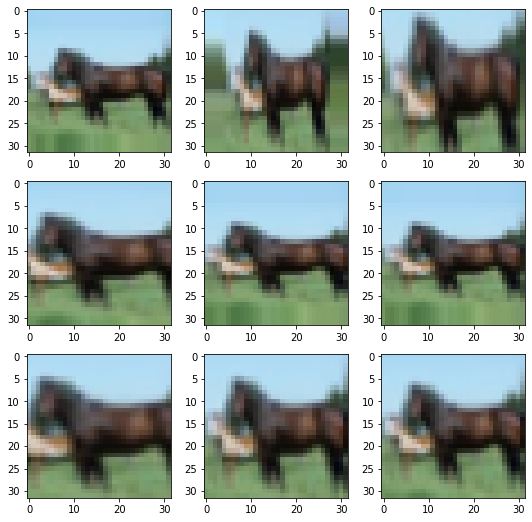

In [5]:
generator = ImageDataGenerator(zoom_range=0.4)  # 확대 축소하는 범위를 지정
show_images(image, generator)

리스트7.21 데이터 확장 -랜덤으로 반전-

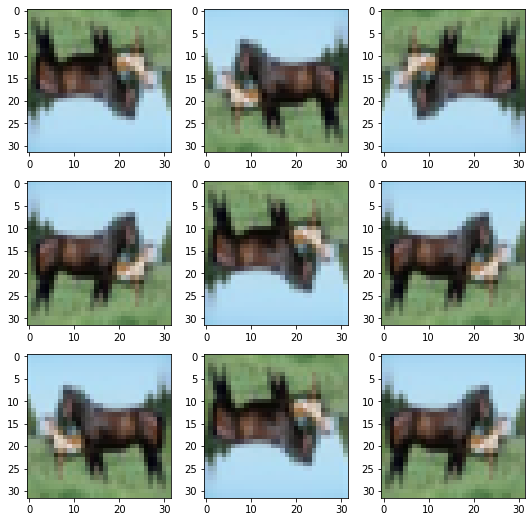

In [6]:
generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)  # 수평, 수직 방향으로 랜덤으로 반전
show_images(image, generator)

리스트7.22 CNN 모델을 구축한다


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

batch_size = 32
epochs = 20
n_class = 10

t_train = tf.keras.utils.to_categorical(t_train, n_class)  # one-hot 표현으로
t_test = tf.keras.utils.to_categorical(t_test, n_class)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))  # 제로 패딩, 배치 크기 이외의 이미지의 형태를 지정
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # 1차원 배열로 변환
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))  # 드롭 아웃
model.add(Dense(n_class))
model.add(Activation('softmax'))

# 최적화 알고리즘에 Adam, 손실 함수에 교차 엔트로피를 지정해서 컴파일
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 15, 15, 64)        0

리스트7.23 CNN 모델을 데이터 확장과 함께 훈련한다

In [8]:
x_train = x_train / 255  # 0부터 1의 범위에 넣는다
x_test = x_test / 255

generator = ImageDataGenerator(
           rotation_range=0.2,  # 랜덤으로 회전
           horizontal_flip=True)  # 랜덤으로, 수평 방향으로 반전
generator.fit(x_train)

history = model.fit(generator.flow(x_train, t_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, t_test))

Epoch 1/20
1563/1563 [==============================] - 81s 51ms/step - loss: 1.7876 - accuracy: 0.3369 - val_loss: 1.1365 - val_accuracy: 0.5886
Epoch 2/20
1563/1563 [==============================] - 102s 66ms/step - loss: 1.1657 - accuracy: 0.5875 - val_loss: 0.9369 - val_accuracy: 0.6687
Epoch 3/20
1563/1563 [==============================] - 100s 64ms/step - loss: 0.9929 - accuracy: 0.6503 - val_loss: 0.8768 - val_accuracy: 0.6922
Epoch 4/20
1563/1563 [==============================] - 98s 63ms/step - loss: 0.8901 - accuracy: 0.6889 - val_loss: 0.8316 - val_accuracy: 0.7106
Epoch 5/20
1563/1563 [==============================] - 89s 57ms/step - loss: 0.8143 - accuracy: 0.7152 - val_loss: 0.8341 - val_accuracy: 0.7102
Epoch 6/20
1563/1563 [==============================] - 84s 54ms/step - loss: 0.7722 - accuracy: 0.7307 - val_loss: 0.7677 - val_accuracy: 0.7370
Epoch 7/20
1563/1563 [==============================] - 85s 54ms/step - loss: 0.7284 - accuracy: 0.7439 - val_loss: 0.7072

KeyboardInterrupt: 

리스트7.24 학습의 추이를 표시

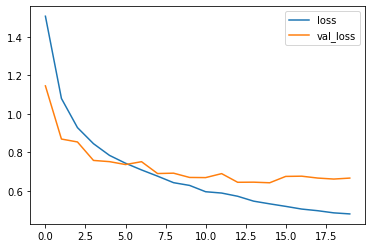

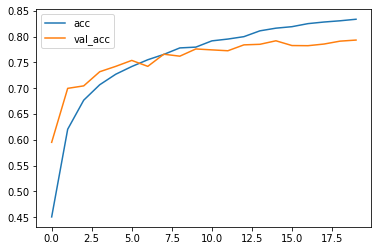

In [9]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']  # 훈련용 데이터의 오차 
train_acc = history.history['accuracy']  # 훈련용 데이터의 정밀도
val_loss = history.history['val_loss']  # 검증용 데이터의 오차                   
val_acc = history.history['val_accuracy']  # 검증용 데이터의 정밀도

plt.plot(np.arange(len(train_loss)), train_loss, label='loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='val_loss')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label='acc')
plt.plot(np.arange(len(val_acc)), val_acc, label='val_acc')
plt.legend()
plt.show()

리스트7.25 모델의 평가

In [10]:
loss, accuracy = model.evaluate(x_test, t_test)
print("오차: ", loss, "정밀도: ", accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.6663 - accuracy: 0.7931
오차:  0.6662936806678772 정밀도:  0.7930999994277954


리스트7.26 학습한 모델로 예측

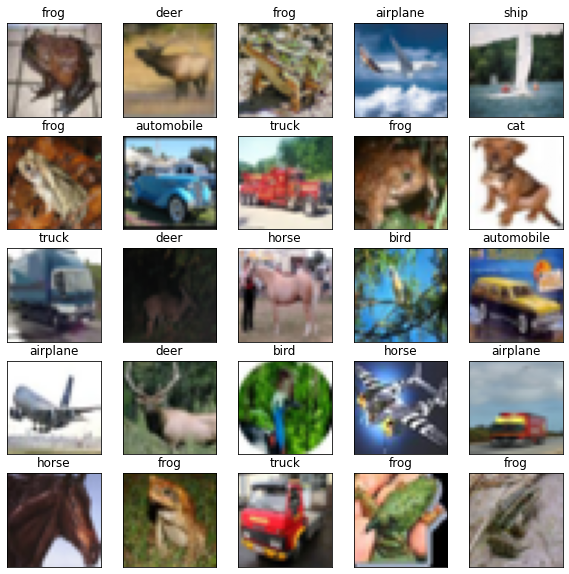

In [11]:
n_image = 25  # 이미지의 표시 수
rand_idx = np.random.randint(0, len(x_test), n_image)  # 난수

y_rand = model.predict(x_test[rand_idx])  # 랜덤인 이미지를 입력으로서 예측 
predicted_class = np.argmax(y_rand, axis=1)

plt.figure(figsize=(10, 10))  # 이미지의 표시 크기
for i in range(n_image):
    cifar_img=plt.subplot(5, 5, i+1)
    plt.imshow(x_test[rand_idx[i]])
    label = cifar10_labels[predicted_class[i]]  # 라벨명의 취득 
    plt.title(label)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
plt.show()

리스트7.27 모델의 저장

In [12]:
#from google.colab import drive
#drive.mount('/content/drive/')

Mounted at /content/drive/


In [13]:
#import os
#from keras.models import load_model

#path = '/content/drive/My Drive/cnn_cifar10/'

# 디렉터리를 작성한다
#if not os.path.exists(path):
#    os.makedirs(path)

# 파일을 저장한다
#model.save(path + "model_cnn_cifar10.h5")